In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

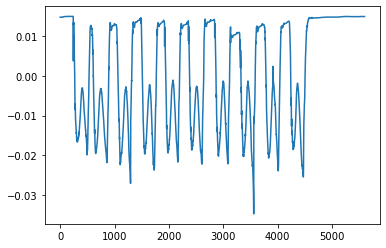

In [93]:
data = pd.read_csv('lefthand_normal_4.csv',header = None)
data1 = data.iloc[:,1:]
dat = data1.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
mat = np.transpose(np.array(dat))
U,S,VT =np.linalg.svd(mat)
plt.plot(VT[1,:])

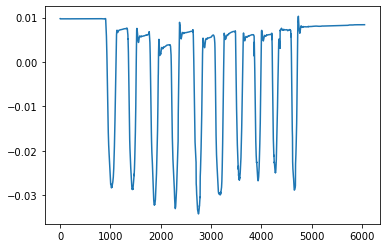

In [52]:
data = pd.read_csv('lefthand_abnormal_1.csv',header = None)
data1 = data.iloc[:,1:]
dat = data1.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
mat = np.transpose(np.array(dat))
U,S,VT =np.linalg.svd(mat)
plt.plot(VT[1,:])

In [53]:
# V_test = VT[1,:]
# start_list = []
# end_list = []
# for step in range(1,len(V_test)):
#     if V_test[step]-V_test[step-1]<-0.0005 and V_test[step-1] > 0:
#         start_list.append(step-1)
#     elif V_test[step]-V_test[step-1]>0.0005:
#         end_list.append(step)
# #assert len(step_list)%2 == 0
# start_list = np.array(start_list)
# end_list = np.array(end_list)

    

In [ ]:
data = pd.read_csv('lefthand_abnormal_1.csv',header = None)
data1 = data.iloc[:,1:]
dat = data1.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
mat = np.transpose(np.array(dat))
U,S,VT =np.linalg.svd(mat)
plt.plot(VT[1,:])

In [103]:
def get_major_frequency(raw_data):
    """
    raw_data = pd.read_csv('lefthand_abnormal_1.csv',header = None)
    """
    data1 = raw_data.iloc[:,1:]
    dat = data1.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
    mat = np.transpose(np.array(dat))
    U,S,VT =np.linalg.svd(mat)
    return VT[1,:]
    
    

In [94]:
def simplist_filter(x,lim = 0.01):
    x_ = x.copy()
    for idx in range(3,len(x_)):
        if abs(x_[idx] - x_[idx-3]) > lim:
            x_[idx] = x[idx-3]
    return x_

In [95]:
def get_raw_start_end_list(V_test,lim_a=-0.0004,lim_b=0.0004):
    start_list = []
    end_list = []
    for step in range(1,len(V_test)):
        if V_test[step]-V_test[step-1]<lim_a and V_test[step-1]>0 and V_test[step+40]<-0.01:
            start_list.append(step-1)
        elif V_test[step]-V_test[step-1]>lim_b and V_test[step]>0 and V_test[step-40]<-0.01:
            end_list.append(step)
    #assert len(step_list)%2 == 0
    start_list = np.array(start_list)
    end_list = np.array(end_list)
    return start_list,end_list
    
    

In [96]:
start_list,end_list = get_raw_start_end_list(simplist_filter(VT[1,:]))

In [97]:
# plt.plot(VT[1,:][1090:1200])
num = 2211
VT[1,:][num] -  VT[1,:][num-1]

-0.0006465865161616735

In [98]:
start_list,end_list

(array([ 240,  242,  248,  250,  252,  254,  256,  257,  258,  259,  260,
         262,  264,  265,  266,  267,  585,  587,  595,  597,  600,  602,
         603,  604,  605,  606,  607,  608,  610, 1040, 1042, 1044, 1047,
        1049, 1051, 1052, 1053, 1054, 1055, 1057, 1058, 1059, 1060, 1061,
        1483, 1485, 1491, 1493, 1495, 1496, 1498, 1500, 1501, 1502, 1503,
        1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1918, 1919, 1924,
        1926, 1928, 1929, 1931, 1933, 1934, 1935, 1936, 1937, 1939, 1941,
        1942, 2355, 2357, 2358, 2361, 2363, 2364, 2365, 2366, 2368, 2369,
        2370, 2371, 2372, 2374, 2376, 2377, 2378, 2839, 2844, 2846, 2849,
        2851, 2853, 2854, 2855, 2856, 2857, 2859, 2861, 2862, 2863, 2864,
        3300, 3303, 3306, 3308, 3309, 3310, 3311, 3312, 3314, 3316, 3317,
        3318, 3319, 3320, 3321, 3322, 3759, 3763, 3766, 3768, 3770, 3771,
        3772, 3773, 3774, 3777, 3778, 3779, 3780, 3781, 3782, 4216, 4222,
        4224, 4225, 4227, 4229, 4231, 

In [99]:
def get_start_edit(start_list_raw):
    start_list = start_list_raw.copy()
    for i in range(len(start_list)):
        if start_list[i] != -1:
            count = 0
            for j in range(i+1,len(start_list)):
                if start_list[j]-start_list[i]<80:
                    count +=1
                    start_list[j] = -1
            if count < 1:
                start_list[i] = -1
    start_list_edit = start_list[np.where(start_list != -1)] 
    return start_list_edit
    
    

In [100]:
#end_list[::-1]
def get_end_edit(end_list_raw):
    end_list = end_list_raw.copy()
    end_list = end_list[::-1]
    for i in range(len(end_list)):
        if end_list[i] != -1:
            count = 0
            for j in range(i+1,len(end_list)):
                if abs(end_list[j]-end_list[i])<80:
                    count +=1
                    end_list[j] = -1
            if count < 1:
                end_list[i] = -1
    end_list_edit = end_list[np.where(end_list != -1)][::-1] 
    return end_list_edit

In [101]:
# start_list_edit = start_list[np.where(start_list != -1)] 
start_list_edit = get_start_edit(start_list)
end_listd_edit = get_end_edit(end_list)

<function matplotlib.pyplot.show(close=None, block=None)>

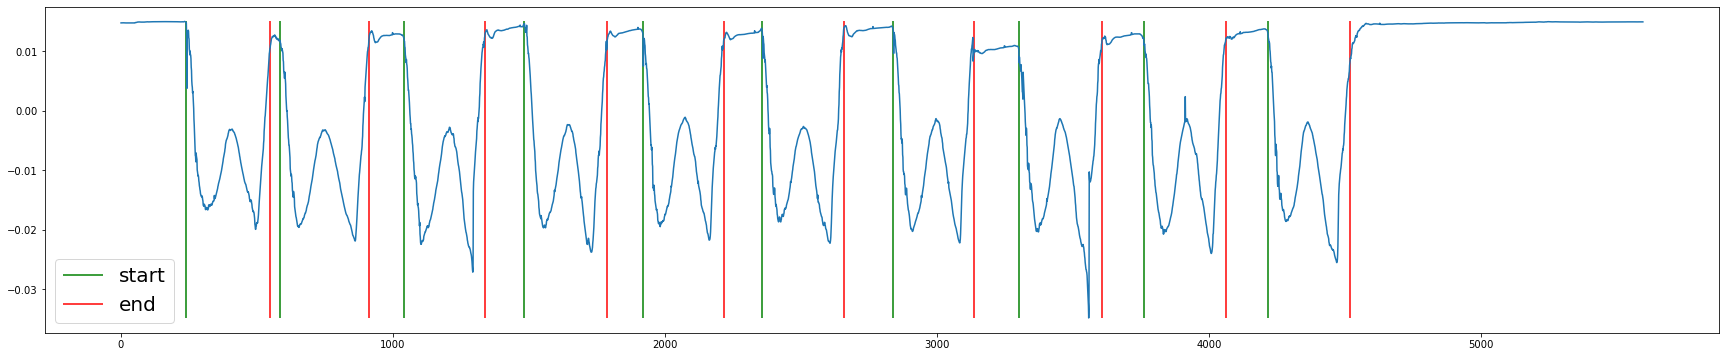

In [102]:
plt.figure(figsize=(30,6))
plt.plot(VT[1,:])
plt.vlines(start_list_edit,np.min(VT[1,:]),np.max(VT[1,:]),color = "g",label='start')
plt.vlines(end_listd_edit,np.min(VT[1,:]),np.max(VT[1,:]),color = "red",label = 'end')
plt.legend(fontsize = 20)
plt.show

In [81]:
start_list,start_list_edit

(array([ 921,  923,  924,  925,  926,  927,  928,  930,  931,  932, 1347,
        1353, 1354, 1355, 1356, 1357, 1358, 1359, 1360, 1786, 1787, 1788,
        1789, 1790, 1791, 1792, 1793, 2207, 2208, 2209, 2648, 2650, 2651,
        2652, 2653, 2654, 2655, 2656, 2657, 2658, 3077, 3079, 3080, 3081,
        3082, 3083, 3084, 3488, 3489, 3490, 3491, 3492, 3493, 3494, 3495,
        3496, 3858, 3859, 3861, 3863, 3865, 3866, 3867, 3868, 4210, 4213,
        4214, 4215, 4216, 4217, 4218, 4219, 4220, 4587, 4593, 4594, 4595,
        4596, 4597, 4598, 4599, 4600, 4601]),
 array([ 921, 1347, 1786, 2207, 2648, 3077, 3488, 3858, 4210, 4587]))

In [83]:
end_list,end_listd_edit

(array([1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1119, 1514,
        1515, 1516, 1517, 1518, 1519, 1520, 1521, 1955, 1956, 1958, 1959,
        2364, 2365, 2366, 2367, 2368, 2369, 2370, 2371, 2830, 2831, 2832,
        2833, 2834, 2835, 2836, 3255, 3256, 3257, 3258, 3259, 3260, 3261,
        3262, 3263, 3632, 3633, 3634, 3635, 3636, 3637, 3638, 3639, 3640,
        3997, 3998, 3999, 4000, 4001, 4002, 4003, 4340, 4341, 4342, 4343,
        4344, 4345, 4346, 4347, 4719, 4720, 4721, 4722, 4723, 4724, 4725,
        4726, 4727, 4728]),
 array([1119, 1521, 1959, 2371, 2836, 3263, 3640, 4003, 4347, 4728]))

In [272]:
import pywt
def madev(d, axis=None):
    """ Mean absolute deviation of a signal """
    return np.mean(np.absolute(d - np.mean(d, axis)), axis)
def wavelet_denoising(x, wavelet, level, s_factor):
    """
    deconstructs, thresholds then reconstructs
    higher thresholds = less detailed reconstruction
    """
    coeff = pywt.wavedec(x, wavelet, mode="per")
    sigma = (1 / 0.6745) * madev(coeff[-level]) * s_factor
    uthresh = sigma * np.sqrt(2 * np.log(len(x)))
    coeff[1:] = (pywt.threshold(i, value=uthresh, mode='hard') for i in coeff[1:])
    return pywt.waverec(coeff, wavelet, mode='per')

Text(0.5, 1.0, 'denoising')

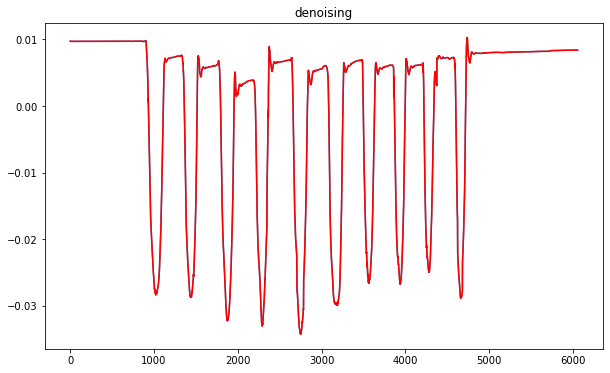

In [345]:
x = VT[1,:]
plt.figure(figsize=(10, 6))
plt.plot(x)
#plt.plot(wavelet_denoising(x, 'db2', 3, 9),'r')
plt.plot(simplist_filter(x),'r')
plt.title("denoising")

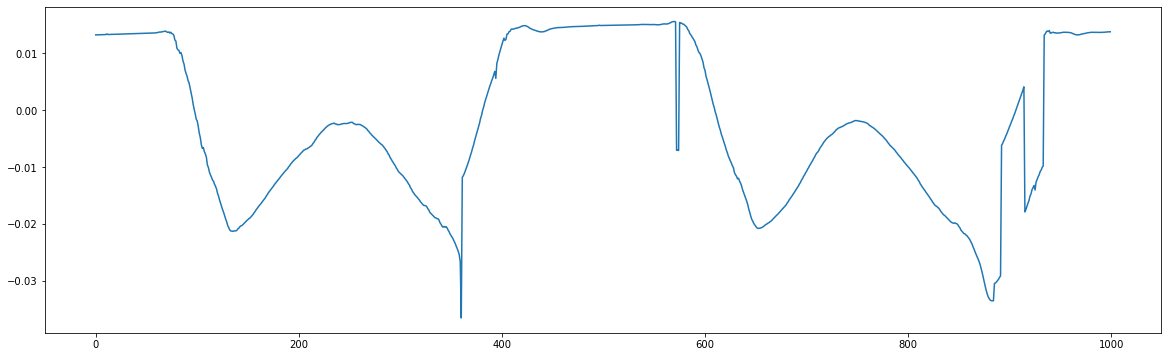

In [234]:
plt.figure(figsize=(20, 6))
plt.plot(VT[1,:][3000:4000])